# FM Stereo: Frequency Domain Analysis

This notebook visualizes the signal at various stages of the FM stereo broadcasting chain in the frequency domain.

### Stages to Visualize:
1. **Input Audio**: The original audio spectrum.
2. **Stereo Composite Signal**: The multiplexed signal before FM modulation.
3. **FM Modulated Signal**: The signal as it travels through the air (baseband simulation).
4. **Recovered Audio**: Total signal recovery after receiving and decoding.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from fm_stereo_system import FMStereoTransmitter, FMStereoReceiver, load_audio
import os

## 1. Load Audio and Setup System

In [2]:
# Load audio
left_orig, right_orig, fs_audio = load_audio("audio/stereo.wav")
print(f"Loaded audio at {fs_audio} Hz")

# Setup transmitter and receiver
delta_f = 75e3
tx = FMStereoTransmitter(fs_audio=fs_audio, delta_f=delta_f)
rx = FMStereoReceiver(fs_audio=fs_audio, delta_f=delta_f)

Loaded audio at 44100 Hz


## 2. Process Signal Through Chain

In [3]:
# A) Transmit: Audio -> Composite -> FM
fm_signal, composite_pre, fs_comp = tx.transmit(left_orig, right_orig)

# B) Receive: FM -> Demodulated Composite -> Audio
left_rx, right_rx = rx.receive(fm_signal, fs_comp)
composite_demod = rx.fm_demodulate(fm_signal, fs_comp)

## 3. Frequency Domain Comparison

We use the Power Spectral Density (PSD) to see the energy distribution at each stage.

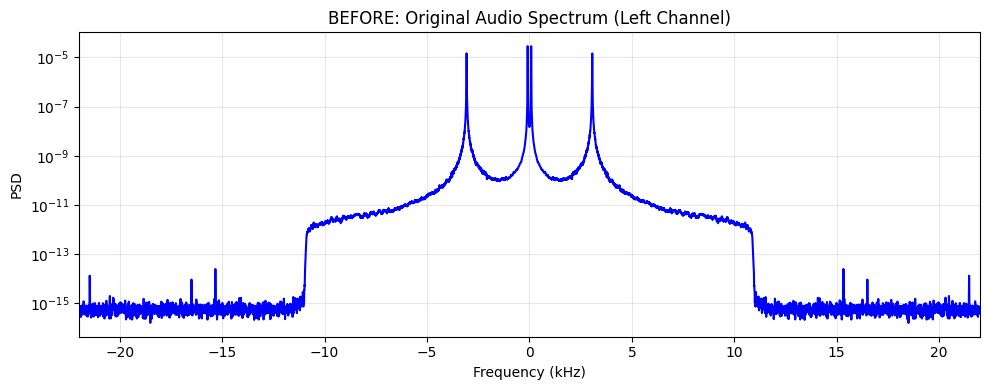

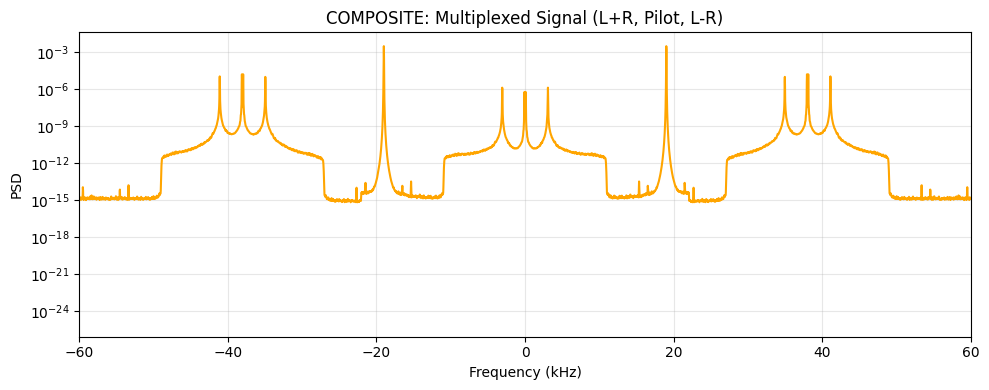

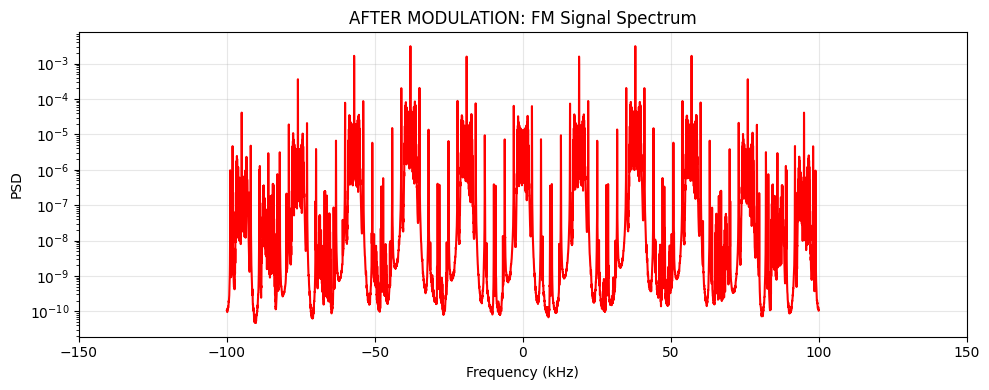

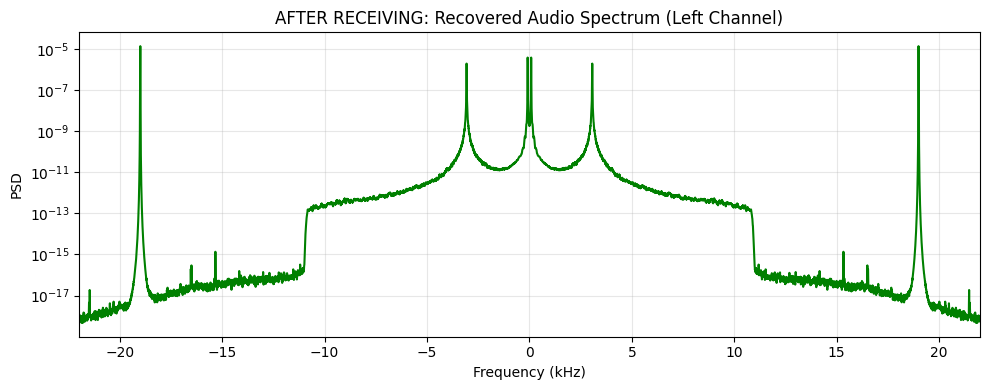

In [4]:
def plot_psd(sig, fs, title, color='b', xlim=None):
    nperseg = min(len(sig), 8192)
    f, psd = signal.welch(sig, fs, nperseg=nperseg, return_onesided=False)
    idx = np.argsort(f)
    plt.figure(figsize=(10, 4))
    plt.semilogy(f[idx] / 1e3, psd[idx], color=color)
    plt.title(title)
    plt.xlabel('Frequency (kHz)')
    plt.ylabel('PSD')
    plt.grid(True, alpha=0.3)
    if xlim: plt.xlim(xlim)
    plt.tight_layout()
    plt.show()

# 1. BEFORE TRANSMITTING (Input Audio)
plot_psd(left_orig, fs_audio, "BEFORE: Original Audio Spectrum (Left Channel)", 'blue', xlim=(-22, 22))

# 2. COMPOSITE STYREO (Multiplexed)
plot_psd(composite_pre, fs_comp, "COMPOSITE: Multiplexed Signal (L+R, Pilot, L-R)", 'orange', xlim=(-60, 60))

# 3. AFTER MODULATION (FM Signal)
plot_psd(fm_signal, fs_comp, "AFTER MODULATION: FM Signal Spectrum", 'red', xlim=(-150, 150))

# 4. AFTER RECEIVING (Recovered Audio)
plot_psd(left_rx, fs_audio, "AFTER RECEIVING: Recovered Audio Spectrum (Left Channel)", 'green', xlim=(-22, 22))

### Key Takeaways:
1. **Input Audio**: Contained within 0-15 kHz (mostly).
2. **Composite**: Notice the **Pilot at 19 kHz** and the **Subcarrier at 38 kHz**. This is why we resample!
3. **FM Signal**: Notice how wide it is compared to the composite. This is the bandwidth expansion characteristic of FM.
4. **Recovered Audio**: Should look nearly identical to the original input audio, albeit with some noise floor changes depending on the simulation quality.